In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load datasets

In [2]:
#user related data
user_engagements = pd.read_csv('user_engagements.csv')

C:\Users\wan14\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,1,2,3,5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# transaction related data

transaction_dimensions = pd.read_csv('transaction_dimensions.csv')
transaction_financials = pd.read_csv('transaction_financials.csv')
dim_channel = pd.read_csv('dim_channel.csv')
currency_details = pd.read_csv('currency_details.csv')
fx_rates_eur = pd.read_csv('fx_rates_eur.csv')
cities = pd.read_csv('cities.csv')

In [4]:
# reference data - not useful for this task, so skipped
#platforms = pd.read_csv('platforms.csv')
#country_currency_mapping = pd.read_csv('country_currency_mapping.csv')

# 1 - User related data: checking, cleaning and processing

In [5]:
user_engagements.dtypes

sessionid           object
funnel_level        object
customerid          object
userid              object
visit_duration     float64
loginid             object
platform            object
transaction_id      object
sessiondatetime     object
dtype: object

In [6]:
len(user_engagements)

1798608

In [7]:
user_engagements.isna().sum()

sessionid           642458
funnel_level        642479
customerid         1042477
userid              642458
visit_duration      642479
loginid            1042464
platform                 0
transaction_id      400000
sessiondatetime     642458
dtype: int64

In [8]:
user_engagements.head()

,sessionid,funnel_level,customerid,userid,visit_duration,loginid,platform,transaction_id,sessiondatetime
0,03327977b7c2fba25bb131922983a882f40945b5,service,NaN,d4c7eb82ca3b613e395aaebc1559f4d007899bbc,0.0,NaN,WEB,NaN,2020-05-24 08:41:00
1,0b56a45b8dbd6cb5323a3a7b80be3eb48ea3f7ba,service,NaN,a07394c246f775799ca71492fcfd6ef6dce4a084,45.0,NaN,APP,NaN,2020-05-10 07:53:06
2,1d8de5efe1ac81ea2fa193dff9546d3af5af5764,service,NaN,4e13f53409a9887e936107dd3a016d9cfbc5a067,1.0,NaN,APP,NaN,2019-12-26 18:08:22
3,c9fff1caf5cef6054e76136e5f523974332baea5,service,NaN,f3ad470495b9cd4623edd79a151ad834c8b21c75,1199.0,NaN,APP,NaN,2019-12-23 19:55:24
4,d7bdc47e1b3ad58e9f80a87c5d5f3a3a2c7cebac,service,NaN,84fa728e41e8b6edd935f275d35772ad294face1,3.0,NaN,APP,NaN,2019-12-29 12:44:49


Create dummy variable column for transaction and login

In [9]:
#fill in missing values,based on if there is no login_id or transaction_id, it means it is not logged in, or not transacted

user_engagements['loginid'].fillna(0,inplace=True)
user_engagements['transaction_id'].fillna(0,inplace=True)

In [10]:
def dummy(x):
    if x == 0:
        return 0
    return 1

In [11]:
user_engagements['transaction_dummy'] = user_engagements['transaction_id'].apply(dummy)
user_engagements['login_dummy'] = user_engagements['loginid'].apply(dummy)

In [12]:
user_engagements.head()

,sessionid,funnel_level,customerid,userid,visit_duration,loginid,platform,transaction_id,sessiondatetime,transaction_dummy,login_dummy
0,03327977b7c2fba25bb131922983a882f40945b5,service,NaN,d4c7eb82ca3b613e395aaebc1559f4d007899bbc,0.0,0,WEB,0,2020-05-24 08:41:00,0,0
1,0b56a45b8dbd6cb5323a3a7b80be3eb48ea3f7ba,service,NaN,a07394c246f775799ca71492fcfd6ef6dce4a084,45.0,0,APP,0,2020-05-10 07:53:06,0,0
2,1d8de5efe1ac81ea2fa193dff9546d3af5af5764,service,NaN,4e13f53409a9887e936107dd3a016d9cfbc5a067,1.0,0,APP,0,2019-12-26 18:08:22,0,0
3,c9fff1caf5cef6054e76136e5f523974332baea5,service,NaN,f3ad470495b9cd4623edd79a151ad834c8b21c75,1199.0,0,APP,0,2019-12-23 19:55:24,0,0
4,d7bdc47e1b3ad58e9f80a87c5d5f3a3a2c7cebac,service,NaN,84fa728e41e8b6edd935f275d35772ad294face1,3.0,0,APP,0,2019-12-29 12:44:49,0,0


Convert string variables to numeric variables

In [13]:
#date to weekday/weekend

import datetime

In [14]:
#df = user_engagements['sessiondatetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

user_engagements['Date'] = pd.to_datetime(user_engagements['sessiondatetime'].str[:10], format='%Y-%m-%d')

In [15]:
user_engagements['Time'] = pd.to_datetime(user_engagements['sessiondatetime'].str[12:], format='%H:%M:%S')

In [16]:
user_engagements['day_of_week'] = user_engagements['Date'].dt.day_name()

In [17]:
# As there are too many flavors in day of week, I'll create a dummy variable for if it's weekday(0) or weekend(1)

def day(x):
    if x.weekday() <=5:
        return "Weekday"
    if x.weekday() >5:
        return "Weekend"

In [18]:
user_engagements.head()

,sessionid,funnel_level,customerid,userid,visit_duration,loginid,platform,transaction_id,sessiondatetime,transaction_dummy,login_dummy,Date,Time,day_of_week
0,03327977b7c2fba25bb131922983a882f40945b5,service,NaN,d4c7eb82ca3b613e395aaebc1559f4d007899bbc,0.0,0,WEB,0,2020-05-24 08:41:00,0,0,2020-05-24,1900-01-01 08:41:00,Sunday
1,0b56a45b8dbd6cb5323a3a7b80be3eb48ea3f7ba,service,NaN,a07394c246f775799ca71492fcfd6ef6dce4a084,45.0,0,APP,0,2020-05-10 07:53:06,0,0,2020-05-10,1900-01-01 07:53:06,Sunday
2,1d8de5efe1ac81ea2fa193dff9546d3af5af5764,service,NaN,4e13f53409a9887e936107dd3a016d9cfbc5a067,1.0,0,APP,0,2019-12-26 18:08:22,0,0,2019-12-26,1900-01-01 08:08:22,Thursday
3,c9fff1caf5cef6054e76136e5f523974332baea5,service,NaN,f3ad470495b9cd4623edd79a151ad834c8b21c75,1199.0,0,APP,0,2019-12-23 19:55:24,0,0,2019-12-23,1900-01-01 09:55:24,Monday
4,d7bdc47e1b3ad58e9f80a87c5d5f3a3a2c7cebac,service,NaN,84fa728e41e8b6edd935f275d35772ad294face1,3.0,0,APP,0,2019-12-29 12:44:49,0,0,2019-12-29,1900-01-01 02:44:49,Sunday


In [19]:
user_engagements['Day'] = user_engagements['Date'].apply(day)

In [20]:
def weekend(x):
    if x == "Weekend":
        return 1
    if x == "Weekday":
        return 0

In [21]:
user_engagements['Weekend_dummy'] = user_engagements['Day'].apply(weekend)

In [22]:
user_engagements.head()

,sessionid,funnel_level,customerid,userid,visit_duration,loginid,platform,transaction_id,sessiondatetime,transaction_dummy,login_dummy,Date,Time,day_of_week,Day,Weekend_dummy
0,03327977b7c2fba25bb131922983a882f40945b5,service,NaN,d4c7eb82ca3b613e395aaebc1559f4d007899bbc,0.0,0,WEB,0,2020-05-24 08:41:00,0,0,2020-05-24,1900-01-01 08:41:00,Sunday,Weekend,1.0
1,0b56a45b8dbd6cb5323a3a7b80be3eb48ea3f7ba,service,NaN,a07394c246f775799ca71492fcfd6ef6dce4a084,45.0,0,APP,0,2020-05-10 07:53:06,0,0,2020-05-10,1900-01-01 07:53:06,Sunday,Weekend,1.0
2,1d8de5efe1ac81ea2fa193dff9546d3af5af5764,service,NaN,4e13f53409a9887e936107dd3a016d9cfbc5a067,1.0,0,APP,0,2019-12-26 18:08:22,0,0,2019-12-26,1900-01-01 08:08:22,Thursday,Weekday,0.0
3,c9fff1caf5cef6054e76136e5f523974332baea5,service,NaN,f3ad470495b9cd4623edd79a151ad834c8b21c75,1199.0,0,APP,0,2019-12-23 19:55:24,0,0,2019-12-23,1900-01-01 09:55:24,Monday,Weekday,0.0
4,d7bdc47e1b3ad58e9f80a87c5d5f3a3a2c7cebac,service,NaN,84fa728e41e8b6edd935f275d35772ad294face1,3.0,0,APP,0,2019-12-29 12:44:49,0,0,2019-12-29,1900-01-01 02:44:49,Sunday,Weekend,1.0


In [23]:
user_engagements.dtypes

sessionid                    object
funnel_level                 object
customerid                   object
userid                       object
visit_duration              float64
loginid                      object
platform                     object
transaction_id               object
sessiondatetime              object
transaction_dummy             int64
login_dummy                   int64
Date                 datetime64[ns]
Time                 datetime64[ns]
day_of_week                  object
Day                          object
Weekend_dummy               float64
dtype: object

In [24]:
#platform

user_engagements['platform'].unique()

array(['WEB', 'APP', 'WEBSITE'], dtype=object)

In [25]:
def check_dummy(x, y):
    if x == y:
        return 1
    return 0

In [26]:
user_engagements['WEB'] = user_engagements['platform'].apply(check_dummy, args=('WEB',))
user_engagements['APP'] = user_engagements['platform'].apply(check_dummy, args=('APP',))
user_engagements['WEBSITE'] = user_engagements['platform'].apply(check_dummy, args=('WEBSITE',))

In [27]:
user_engagements.head()

,sessionid,funnel_level,customerid,userid,visit_duration,loginid,platform,transaction_id,sessiondatetime,transaction_dummy,login_dummy,Date,Time,day_of_week,Day,Weekend_dummy,WEB,APP,WEBSITE
0,03327977b7c2fba25bb131922983a882f40945b5,service,NaN,d4c7eb82ca3b613e395aaebc1559f4d007899bbc,0.0,0,WEB,0,2020-05-24 08:41:00,0,0,2020-05-24,1900-01-01 08:41:00,Sunday,Weekend,1.0,1,0,0
1,0b56a45b8dbd6cb5323a3a7b80be3eb48ea3f7ba,service,NaN,a07394c246f775799ca71492fcfd6ef6dce4a084,45.0,0,APP,0,2020-05-10 07:53:06,0,0,2020-05-10,1900-01-01 07:53:06,Sunday,Weekend,1.0,0,1,0
2,1d8de5efe1ac81ea2fa193dff9546d3af5af5764,service,NaN,4e13f53409a9887e936107dd3a016d9cfbc5a067,1.0,0,APP,0,2019-12-26 18:08:22,0,0,2019-12-26,1900-01-01 08:08:22,Thursday,Weekday,0.0,0,1,0
3,c9fff1caf5cef6054e76136e5f523974332baea5,service,NaN,f3ad470495b9cd4623edd79a151ad834c8b21c75,1199.0,0,APP,0,2019-12-23 19:55:24,0,0,2019-12-23,1900-01-01 09:55:24,Monday,Weekday,0.0,0,1,0
4,d7bdc47e1b3ad58e9f80a87c5d5f3a3a2c7cebac,service,NaN,84fa728e41e8b6edd935f275d35772ad294face1,3.0,0,APP,0,2019-12-29 12:44:49,0,0,2019-12-29,1900-01-01 02:44:49,Sunday,Weekend,1.0,0,1,0


save user related data to csv

In [28]:
user_engagements.to_csv( "1_user_engagements.csv", sep=',', index=False, encoding='utf-8-sig')

# Exploring variables relevant to purchase probability

In [3]:
user_engagements= pd.read_csv('1_user_engagements.csv')

C:\Users\wan14\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,1,2,3,5,8,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Exploring variables

user_engagements.groupby('transaction_dummy').mean()

,visit_duration,login_dummy,Weekend_dummy,WEB,APP,WEBSITE
transaction_dummy,,,,,,
0,155.993085,0.00000,0.184015,0.25,0.750000,0.000000
1,548.814049,0.54064,0.188154,0.00,0.769455,0.230545


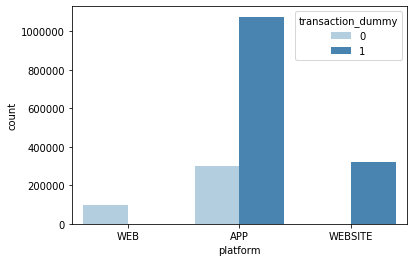

In [5]:
sns.countplot(x="platform", hue ="transaction_dummy", data=user_engagements, palette="Blues");

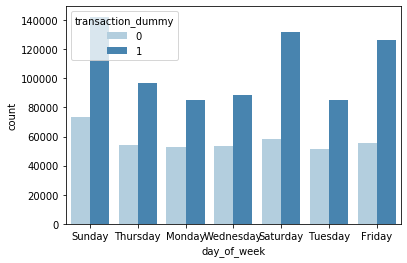

In [6]:
sns.countplot(x="day_of_week", hue ="transaction_dummy", data=user_engagements, palette="Blues");

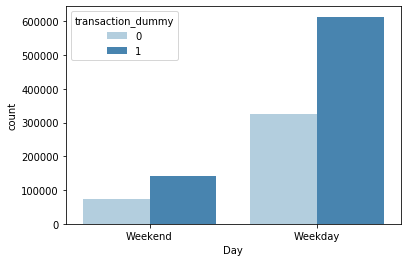

In [7]:
sns.countplot(x="Day", hue ="transaction_dummy", data=user_engagements, palette="Blues");

**Selecting variables**

Based on data exploration, I'd liek to included the following independent variables and dependent variables.

DV:
transaction_dummy


IVs:
- visit_duration
- login_dummy
- Weekend_dummy
- WEB	
- APP	
- WEBSITE

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [9]:
user_engagements.isna().sum()

sessionid             642458
funnel_level          642479
customerid           1042477
userid                642458
visit_duration        642479
loginid                    0
platform                   0
transaction_id             0
sessiondatetime       642458
transaction_dummy          0
login_dummy                0
Date                  642458
Time                  642458
day_of_week           642458
Day                   642458
Weekend_dummy         642458
WEB                        0
APP                        0
WEBSITE                    0
dtype: int64

In [10]:
#I'll drop the rows with missing values in DVs

df_user = user_engagements.dropna(subset=['visit_duration','Weekend_dummy'])

In [11]:
df_user.head()

,sessionid,funnel_level,customerid,userid,visit_duration,loginid,platform,transaction_id,sessiondatetime,transaction_dummy,login_dummy,Date,Time,day_of_week,Day,Weekend_dummy,WEB,APP,WEBSITE
0,03327977b7c2fba25bb131922983a882f40945b5,service,NaN,d4c7eb82ca3b613e395aaebc1559f4d007899bbc,0.0,0,WEB,0,2020-05-24 08:41:00,0,0,2020-05-24,1900-01-01 08:41:00,Sunday,Weekend,1.0,1,0,0
1,0b56a45b8dbd6cb5323a3a7b80be3eb48ea3f7ba,service,NaN,a07394c246f775799ca71492fcfd6ef6dce4a084,45.0,0,APP,0,2020-05-10 07:53:06,0,0,2020-05-10,1900-01-01 07:53:06,Sunday,Weekend,1.0,0,1,0
2,1d8de5efe1ac81ea2fa193dff9546d3af5af5764,service,NaN,4e13f53409a9887e936107dd3a016d9cfbc5a067,1.0,0,APP,0,2019-12-26 18:08:22,0,0,2019-12-26,1900-01-01 08:08:22,Thursday,Weekday,0.0,0,1,0
3,c9fff1caf5cef6054e76136e5f523974332baea5,service,NaN,f3ad470495b9cd4623edd79a151ad834c8b21c75,1199.0,0,APP,0,2019-12-23 19:55:24,0,0,2019-12-23,1900-01-01 09:55:24,Monday,Weekday,0.0,0,1,0
4,d7bdc47e1b3ad58e9f80a87c5d5f3a3a2c7cebac,service,NaN,84fa728e41e8b6edd935f275d35772ad294face1,3.0,0,APP,0,2019-12-29 12:44:49,0,0,2019-12-29,1900-01-01 02:44:49,Sunday,Weekend,1.0,0,1,0


In [12]:
user = df_user[['transaction_dummy','visit_duration','Weekend_dummy','login_dummy','WEB','APP','WEBSITE']]

In [13]:
user.isna().sum()

transaction_dummy    0
visit_duration       0
Weekend_dummy        0
login_dummy          0
WEB                  0
APP                  0
WEBSITE              0
dtype: int64

# Modelling for predicting purchase probability

**Running Logit Regression**

In [14]:
train, test = train_test_split(user, test_size=0.2, random_state=0)

In [15]:
print(len(user), len(train), len(test))

1156129 924903 231226


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logit_clf = LogisticRegression(max_iter=1000, fit_intercept = True)

In [18]:
#Given there are 3 categories for 'platform', I created 2 features.

features1 = ['visit_duration','Weekend_dummy','login_dummy','APP','WEBSITE']
features2 = ['visit_duration','Weekend_dummy','login_dummy','WEB','WEBSITE']

In [19]:
logit_clf.fit(train[features1], train['transaction_dummy'])

C:\Users\wan14\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
pd.DataFrame(np.transpose(logit_clf.coef_), features1)

,0
visit_duration,0.000106
Weekend_dummy,-0.249955
login_dummy,9.302506
APP,-0.564668
WEBSITE,1.063848


In [21]:
import statsmodels.api as sm

The first feature used 'WEB' as the default platform.

In [22]:
logit1 = sm.Logit(train['transaction_dummy'], sm.add_constant(train[features1]))
result1 = logit1.fit(method='bfgs')

C:\Users\wan14\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\wan14\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\wan14\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\wan14\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\wan14\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py

         Current function value: 0.520214
         Iterations: 3
         Function evaluations: 40
         Gradient evaluations: 19


C:\Users\wan14\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [23]:
print(result1.summary())

                           Logit Regression Results                           
Dep. Variable:      transaction_dummy   No. Observations:               924903
Model:                          Logit   Df Residuals:                   924897
Method:                           MLE   Df Model:                            5
Date:                Mon, 14 Nov 2022   Pseudo R-squ.:                  0.1936
Time:                        16:15:05   Log-Likelihood:            -4.8115e+05
converged:                      False   LL-Null:                   -5.9663e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0162      0.007     -2.195      0.028      -0.031      -0.002
visit_duration     0.0014   8.03e-06    178.849      0.000       0.001       0.001
Weekend_dummy     -0.0040      0.006

The second feature used 'APP' as the default platform.

In [24]:
logit2 = sm.Logit(train['transaction_dummy'], sm.add_constant(train[features2]))
result2 = logit2.fit(method='bfgs')
print(result2.summary())

C:\Users\wan14\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\wan14\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\wan14\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\wan14\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\wan14\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py

         Current function value: 0.517794
         Iterations: 3
         Function evaluations: 40
         Gradient evaluations: 21


C:\Users\wan14\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:      transaction_dummy   No. Observations:               924903
Model:                          Logit   Df Residuals:                   924897
Method:                           MLE   Df Model:                            5
Date:                Mon, 14 Nov 2022   Pseudo R-squ.:                  0.1973
Time:                        16:15:10   Log-Likelihood:            -4.7891e+05
converged:                      False   LL-Null:                   -5.9663e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0150      0.004     -3.445      0.001      -0.024      -0.006
visit_duration     0.0014   8.01e-06    179.097      0.000       0.001       0.001
Weekend_dummy     -0.0037      0.006

# Findings

**Results:**

The 2 models are all significant (p < .001).
- The visit duration, logged in status, platform (Web or Website) are significant indicators for the purchase probability.
- The weekend dummy and APP platform are not significant indicators for the purchase probability.


**1) visit duration**

Holding everything else constant, with a one second increase in visit duration, we will see 0.14% times increase in the odds of making a purchase.

**2) login_dummy**

Holding everything else constant, if the user is logged in (vs not logged in), we will see 0.23 times increase in the odds of making a purchase.

**3) platform**

Holding everything else constant, if user is using the Website, we will see 0.04 times increase in the odds of making a purchase.

Holding everything else constant, if user is using the WEB, we will see 0.06 times decrease in the odds of making a purchase.

# 2 - Transaction related data: checking, merging and cleaning

In [3]:
transaction_dimensions.isna().sum()

transaction_id      0
platform            0
currency            0
value               0
channel_id          0
restaurantid        0
country             0
customercityid      0
zipcode           475
customerid          0
orderdatetime       0
dtype: int64

In [4]:
dim_channel.isna().sum()

channel_id      0
channel_name    0
dtype: int64

In [5]:
transaction_financials.isna().sum()

transaction_id         0
currency               0
marketing_cost         0
operation_cost         0
administration_cost    0
commission_revenue     0
other_revenue          0
dtype: int64

In [6]:
currency_details.isna().sum()

currency      0
iso_code     39
exponent     24
is_crypto     0
dtype: int64

In [7]:
fx_rates_eur.isna().sum()

base_ccy      0
ccy           0
rate          0
country_id    0
dtype: int64

In [8]:
cities.isna().sum()

city_id    0
name       0
country    0
dtype: int64

In [9]:
transaction_dimensions.head()

,transaction_id,platform,currency,value,channel_id,restaurantid,country,customercityid,zipcode,customerid,orderdatetime
0,35bb7157e9053b36f0938dfa56f3cda3e6859486,4,EUR,929,2,fc353a5f53aa561f2b42e8b0b434b3098d49f6b7,NL,58d9a3a6707f668c868262b569845bf52057a04d,ZZNL35,cac7ccf2bb9edf47398a346294cbc7e202f1de5e,2019-12-27 16:27:21
1,1642d73673f52b6ccda8c77dba7c8fc3057f0364,4,PLN,170,10,3b27a771388fadc4ac4e4d0058fd69d93ae3cc49,PL,a288f0322922bcb4f3f9367a8624ec2d0027b0ac,ZZPL03,7cfaa0c9ff9f849a42a638d4215dc5b9b7dfeead,2019-12-27 02:57:18
2,991d175469984eab38f0f2e94efd6054ffad05f1,1,EUR,659,-1,5cedec4c0697593f27ffbefdc00ca6aba39c87b2,NL,8c495a298940b9c65f2a0cc50de8c793b53bf32f,ZZNL73,f0293eff477224152e9b5d8dc044a0212c613f61,2019-12-28 03:45:33
3,cf1037e5f5b0fb80f65b91470a347cc7e86720ff,4,EUR,281,2,dc090a627320644b666017f6217b3ec2823491b4,NL,6a883d0501a985dab347616e88b9609010682315,ZZNL31,21ff248f414e3f906fd6f87a513f2604861685f9,2019-12-30 12:17:43
4,eb0be140cf5d009fa47472c6c982de21bcb44fd4,4,EUR,443,1,7c01fe75a1b799232540ece1152d799ee95e82a0,NL,d022a5ba69215319d2645e0c589e69b41c16512a,ZZNL10,f5e996ef3775b96c3c8f24c9b64caad82ba76947,2019-12-24 21:22:54


In [10]:
dim_channel.head()

,channel_id,channel_name
0,-1,channel150
1,2,channel54
2,3,channel51
3,1,channel1
4,7,channel2


merging transaction_dimensions and dim_channel

In [11]:
transaction_dimensions_1 = transaction_dimensions.merge(dim_channel, on='channel_id', how = 'left')

In [12]:
transaction_dimensions_1.head()

,transaction_id,platform,currency,value,channel_id,restaurantid,country,customercityid,zipcode,customerid,orderdatetime,channel_name
0,35bb7157e9053b36f0938dfa56f3cda3e6859486,4,EUR,929,2,fc353a5f53aa561f2b42e8b0b434b3098d49f6b7,NL,58d9a3a6707f668c868262b569845bf52057a04d,ZZNL35,cac7ccf2bb9edf47398a346294cbc7e202f1de5e,2019-12-27 16:27:21,channel54
1,1642d73673f52b6ccda8c77dba7c8fc3057f0364,4,PLN,170,10,3b27a771388fadc4ac4e4d0058fd69d93ae3cc49,PL,a288f0322922bcb4f3f9367a8624ec2d0027b0ac,ZZPL03,7cfaa0c9ff9f849a42a638d4215dc5b9b7dfeead,2019-12-27 02:57:18,channel18
2,991d175469984eab38f0f2e94efd6054ffad05f1,1,EUR,659,-1,5cedec4c0697593f27ffbefdc00ca6aba39c87b2,NL,8c495a298940b9c65f2a0cc50de8c793b53bf32f,ZZNL73,f0293eff477224152e9b5d8dc044a0212c613f61,2019-12-28 03:45:33,channel150
3,cf1037e5f5b0fb80f65b91470a347cc7e86720ff,4,EUR,281,2,dc090a627320644b666017f6217b3ec2823491b4,NL,6a883d0501a985dab347616e88b9609010682315,ZZNL31,21ff248f414e3f906fd6f87a513f2604861685f9,2019-12-30 12:17:43,channel54
4,eb0be140cf5d009fa47472c6c982de21bcb44fd4,4,EUR,443,1,7c01fe75a1b799232540ece1152d799ee95e82a0,NL,d022a5ba69215319d2645e0c589e69b41c16512a,ZZNL10,f5e996ef3775b96c3c8f24c9b64caad82ba76947,2019-12-24 21:22:54,channel1


merging transaction_financials and currency

In [13]:
transaction_financials.head()

,transaction_id,currency,marketing_cost,operation_cost,administration_cost,commission_revenue,other_revenue
0,811dff065ba24d502c518ab7c463d163a8542c75,EUR,20,68,22,248,240
1,fb1e90c0d96632de943fd6a285b9cae68629ea43,EUR,9,6,11,246,345
2,9005ca0e1d54d77cf42a254167b3a401752a40b0,EUR,6,15,9,110,67
3,831fd2201ea136b76bcbd38af2e052e62f824a87,PLN,5,5,53,111,113
4,3fcf6482e6683245ca85f5dcf180d09af0501bb1,EUR,65,539,234,42,88


In [14]:
currency_details.head()

,currency,iso_code,exponent,is_crypto
0,AED,784.0,2.0,False
1,AFN,971.0,2.0,False
2,ALL,8.0,2.0,False
3,AMD,51.0,2.0,False
4,ANG,532.0,2.0,False


In [15]:
transaction_financials_1 = transaction_financials.merge(currency_details, on='currency', how = 'left')

In [16]:
transaction_financials_1.head()

,transaction_id,currency,marketing_cost,operation_cost,administration_cost,commission_revenue,other_revenue,iso_code,exponent,is_crypto
0,811dff065ba24d502c518ab7c463d163a8542c75,EUR,20,68,22,248,240,978.0,2.0,False
1,fb1e90c0d96632de943fd6a285b9cae68629ea43,EUR,9,6,11,246,345,978.0,2.0,False
2,9005ca0e1d54d77cf42a254167b3a401752a40b0,EUR,6,15,9,110,67,978.0,2.0,False
3,831fd2201ea136b76bcbd38af2e052e62f824a87,PLN,5,5,53,111,113,985.0,2.0,False
4,3fcf6482e6683245ca85f5dcf180d09af0501bb1,EUR,65,539,234,42,88,978.0,2.0,False


merge two above tables

In [17]:
transaction_new = transaction_dimensions_1.merge(transaction_financials_1, on='transaction_id', how = 'left')

In [18]:
transaction_new.head()

,transaction_id,platform,currency_x,value,channel_id,restaurantid,country,customercityid,zipcode,customerid,...,channel_name,currency_y,marketing_cost,operation_cost,administration_cost,commission_revenue,other_revenue,iso_code,exponent,is_crypto
0,35bb7157e9053b36f0938dfa56f3cda3e6859486,4,EUR,929,2,fc353a5f53aa561f2b42e8b0b434b3098d49f6b7,NL,58d9a3a6707f668c868262b569845bf52057a04d,ZZNL35,cac7ccf2bb9edf47398a346294cbc7e202f1de5e,...,channel54,EUR,18,175,111,590,61,978.0,2.0,False
1,1642d73673f52b6ccda8c77dba7c8fc3057f0364,4,PLN,170,10,3b27a771388fadc4ac4e4d0058fd69d93ae3cc49,PL,a288f0322922bcb4f3f9367a8624ec2d0027b0ac,ZZPL03,7cfaa0c9ff9f849a42a638d4215dc5b9b7dfeead,...,channel18,PLN,397,137,784,9,28,985.0,2.0,False
2,991d175469984eab38f0f2e94efd6054ffad05f1,1,EUR,659,-1,5cedec4c0697593f27ffbefdc00ca6aba39c87b2,NL,8c495a298940b9c65f2a0cc50de8c793b53bf32f,ZZNL73,f0293eff477224152e9b5d8dc044a0212c613f61,...,channel150,EUR,195,388,74,17,41,978.0,2.0,False
3,cf1037e5f5b0fb80f65b91470a347cc7e86720ff,4,EUR,281,2,dc090a627320644b666017f6217b3ec2823491b4,NL,6a883d0501a985dab347616e88b9609010682315,ZZNL31,21ff248f414e3f906fd6f87a513f2604861685f9,...,channel54,EUR,12,31,20,55,120,978.0,2.0,False
4,eb0be140cf5d009fa47472c6c982de21bcb44fd4,4,EUR,443,1,7c01fe75a1b799232540ece1152d799ee95e82a0,NL,d022a5ba69215319d2645e0c589e69b41c16512a,ZZNL10,f5e996ef3775b96c3c8f24c9b64caad82ba76947,...,channel1,EUR,3,32,27,62,228,978.0,2.0,False


add currency rate data and city info

In [19]:
df1 = pd.merge(transaction_new, fx_rates_eur, how='left', left_on='currency_x', right_on='ccy')

In [20]:
df1.head()

,transaction_id,platform,currency_x,value,channel_id,restaurantid,country,customercityid,zipcode,customerid,...,administration_cost,commission_revenue,other_revenue,iso_code,exponent,is_crypto,base_ccy,ccy,rate,country_id
0,35bb7157e9053b36f0938dfa56f3cda3e6859486,4,EUR,929,2,fc353a5f53aa561f2b42e8b0b434b3098d49f6b7,NL,58d9a3a6707f668c868262b569845bf52057a04d,ZZNL35,cac7ccf2bb9edf47398a346294cbc7e202f1de5e,...,111,590,61,978.0,2.0,False,EUR,EUR,1.000000,128
1,35bb7157e9053b36f0938dfa56f3cda3e6859486,4,EUR,929,2,fc353a5f53aa561f2b42e8b0b434b3098d49f6b7,NL,58d9a3a6707f668c868262b569845bf52057a04d,ZZNL35,cac7ccf2bb9edf47398a346294cbc7e202f1de5e,...,111,590,61,978.0,2.0,False,EUR,EUR,1.000000,129
2,1642d73673f52b6ccda8c77dba7c8fc3057f0364,4,PLN,170,10,3b27a771388fadc4ac4e4d0058fd69d93ae3cc49,PL,a288f0322922bcb4f3f9367a8624ec2d0027b0ac,ZZPL03,7cfaa0c9ff9f849a42a638d4215dc5b9b7dfeead,...,784,9,28,985.0,2.0,False,EUR,PLN,0.241057,118
3,991d175469984eab38f0f2e94efd6054ffad05f1,1,EUR,659,-1,5cedec4c0697593f27ffbefdc00ca6aba39c87b2,NL,8c495a298940b9c65f2a0cc50de8c793b53bf32f,ZZNL73,f0293eff477224152e9b5d8dc044a0212c613f61,...,74,17,41,978.0,2.0,False,EUR,EUR,1.000000,128
4,991d175469984eab38f0f2e94efd6054ffad05f1,1,EUR,659,-1,5cedec4c0697593f27ffbefdc00ca6aba39c87b2,NL,8c495a298940b9c65f2a0cc50de8c793b53bf32f,ZZNL73,f0293eff477224152e9b5d8dc044a0212c613f61,...,74,17,41,978.0,2.0,False,EUR,EUR,1.000000,129


In [21]:
df1['country'].unique()

array(['NL', 'PL', 'AT', 'CH'], dtype=object)

In [22]:
df1['currency_x'].unique()

array(['EUR', 'PLN', 'CHF'], dtype=object)

In [23]:
df2 = pd.merge(df1, cities, how='left', left_on='customercityid', right_on='city_id')

In [24]:
df2.head()

,transaction_id,platform,currency_x,value,channel_id,restaurantid,country_x,customercityid,zipcode,customerid,...,iso_code,exponent,is_crypto,base_ccy,ccy,rate,country_id,city_id,name,country_y
0,35bb7157e9053b36f0938dfa56f3cda3e6859486,4,EUR,929,2,fc353a5f53aa561f2b42e8b0b434b3098d49f6b7,NL,58d9a3a6707f668c868262b569845bf52057a04d,ZZNL35,cac7ccf2bb9edf47398a346294cbc7e202f1de5e,...,978.0,2.0,False,EUR,EUR,1.000000,128,58d9a3a6707f668c868262b569845bf52057a04d,cityNL63,NL
1,35bb7157e9053b36f0938dfa56f3cda3e6859486,4,EUR,929,2,fc353a5f53aa561f2b42e8b0b434b3098d49f6b7,NL,58d9a3a6707f668c868262b569845bf52057a04d,ZZNL35,cac7ccf2bb9edf47398a346294cbc7e202f1de5e,...,978.0,2.0,False,EUR,EUR,1.000000,129,58d9a3a6707f668c868262b569845bf52057a04d,cityNL63,NL
2,1642d73673f52b6ccda8c77dba7c8fc3057f0364,4,PLN,170,10,3b27a771388fadc4ac4e4d0058fd69d93ae3cc49,PL,a288f0322922bcb4f3f9367a8624ec2d0027b0ac,ZZPL03,7cfaa0c9ff9f849a42a638d4215dc5b9b7dfeead,...,985.0,2.0,False,EUR,PLN,0.241057,118,a288f0322922bcb4f3f9367a8624ec2d0027b0ac,cityPL23,PL
3,991d175469984eab38f0f2e94efd6054ffad05f1,1,EUR,659,-1,5cedec4c0697593f27ffbefdc00ca6aba39c87b2,NL,8c495a298940b9c65f2a0cc50de8c793b53bf32f,ZZNL73,f0293eff477224152e9b5d8dc044a0212c613f61,...,978.0,2.0,False,EUR,EUR,1.000000,128,8c495a298940b9c65f2a0cc50de8c793b53bf32f,cityNL78,NL
4,991d175469984eab38f0f2e94efd6054ffad05f1,1,EUR,659,-1,5cedec4c0697593f27ffbefdc00ca6aba39c87b2,NL,8c495a298940b9c65f2a0cc50de8c793b53bf32f,ZZNL73,f0293eff477224152e9b5d8dc044a0212c613f61,...,978.0,2.0,False,EUR,EUR,1.000000,129,8c495a298940b9c65f2a0cc50de8c793b53bf32f,cityNL78,NL


In [25]:
df2.dtypes

transaction_id          object
platform                 int64
currency_x              object
value                    int64
channel_id               int64
restaurantid            object
country_x               object
customercityid          object
zipcode                 object
customerid              object
orderdatetime           object
channel_name            object
currency_y              object
marketing_cost           int64
operation_cost           int64
administration_cost      int64
commission_revenue       int64
other_revenue            int64
iso_code               float64
exponent               float64
is_crypto                 bool
base_ccy                object
ccy                     object
rate                   float64
country_id               int64
city_id                 object
name                    object
country_y               object
dtype: object

In [26]:
df2.to_csv( "2_transaction_data.csv", sep=',', index=False, encoding='utf-8-sig')

I've merged all relevant transaction data, and will proceed with the analysis and visualization in Tableau.